# Pendulum ODE with odeint and Runge-Kutta


In [ ]:
#theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
#theta'(t) = omega(t)
#omega'(t) = -b*omega(t) - c*sin(theta(t))

In [124]:
import numpy as np
import matplotlib.pyplot as plt


In [125]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [126]:
from scipy.integrate import odeint  # for comparison

In [127]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    #dydt = [- np.sin(omega),- np.sin(theta)]
    return dydt

In [128]:
b = 0.25
c = 5.0

In [129]:
y0 = [np.pi - 0.1, 0.0]

In [130]:
t = np.linspace(0, 10, 101)

In [131]:
sol = odeint(pend, y0, t, args=(b, c))

In [132]:
np.shape(sol)

(101, 2)

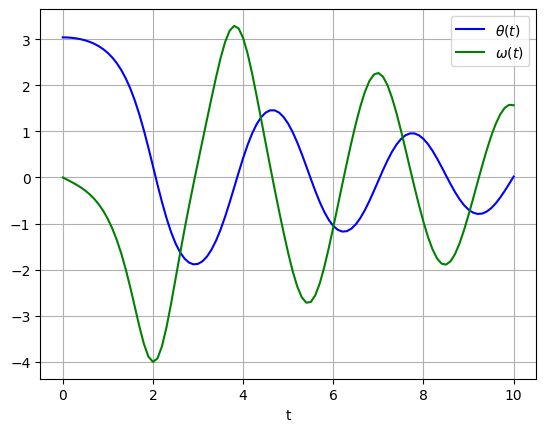

In [133]:
plt.plot(t, sol[:, 0], 'b', label=r'$\theta(t)$')
plt.plot(t, sol[:, 1], 'g', label=r'$\omega(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [134]:
#runge kutta
def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i])*np.array(f(y[i], t[i], *args))
        #print(type(t[i]))
        #print (np.array(f(y[i], t[i], *args)))
    return y

In [135]:
sol = rungekutta1(pend, y0, t, args=(b, c))

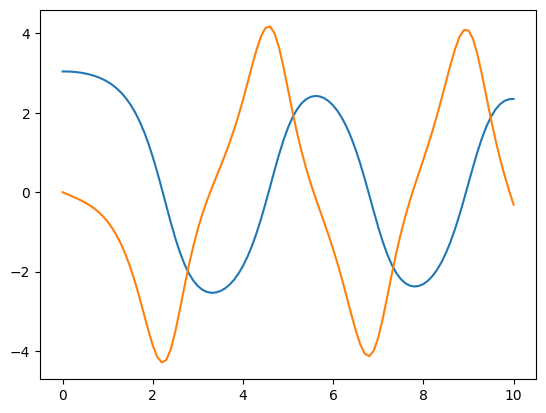

In [136]:
plt.plot(t,sol)

In [137]:
#y'=cos t
def sin(y, t):
    dydt = np.cos(t)
    return dydt

In [138]:
sol2 = odeint(sin, 0, t)

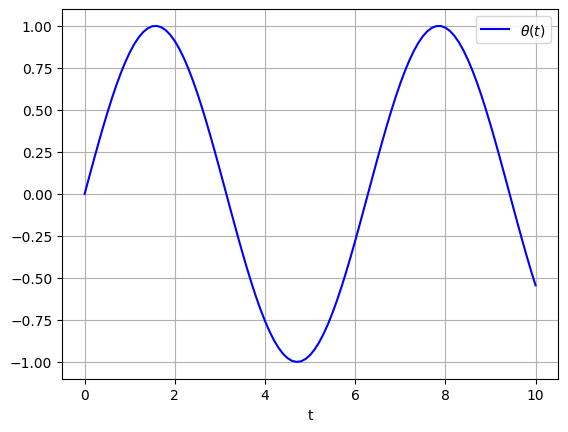

In [139]:
plt.plot(t, sol2, 'b', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [140]:
#runge kutta
def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i])
    return y

In [141]:
y0 = 0

In [142]:
# choose numsteps
numsteps = 10
t = np.linspace(0,10,numsteps)

In [143]:
sol = rungekutta1(sin, y0, t)

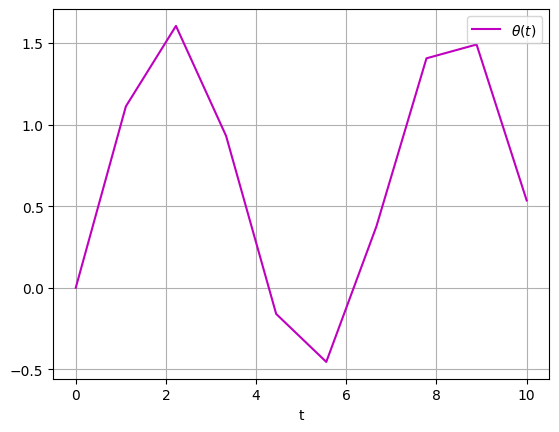

In [144]:
plt.plot(t, sol, 'm', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Runge-Kutta for multiple initial conditions

In [145]:
# Let us improve runge kutta
def rungekutta_mult(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((len(y0), n))
    y[:, 0] = y0
    for i in range(n - 1):
        y[:, i+1] = y[:, i] + (t[i+1] - t[i]) * f(y[:, i], t[i])
    return y

def solve( y0 ):
  y = np.zeros( (len(y0), N))
  y[:,0] = y0
  for i in range(1,N):
    t_i = i*dt
    dy = dt*y_prime( t_i, y[:,i-1] )
    y[:, i] = y[:, i-1] + dy
  #
  return y

In [146]:
y0 = np.random.rand(10)

In [147]:
solutions = rungekutta_mult(sin, y0, t)
#solutions = rungekutta1(sin, y0, t)

Text(0.5, 0, 'Time t')

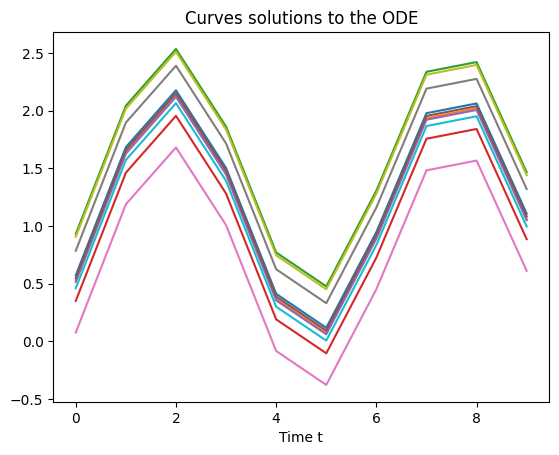

In [148]:
import matplotlib.pyplot as plt

plt.plot( solutions.T )
plt.title( "Curves solutions to the ODE")
plt.xlabel( "Time t")

In [149]:
#Next thing is to try runge kutta for geodesics ode
#Let us first try to compute geodesics on a sphere or any simpe 2-manifold
import numpy as np
u = np.zeros(2)
phi, theta = u

In [150]:
#Christoffel symbols
#u = np.zeros(2)
R = 3
def g (u): #metrics on sphere
    phi, theta = u
    g = (R**2)*np.array([[np.cos(theta)**2, 0],[0, 1]])
    return g

In [151]:
# check
g = g([0,np.pi/4])

In [152]:
g

array([[4.5, 0. ],
       [0. , 9. ]])

In [153]:
def g_inv (u): #inverse metrics on sphere
    phi, theta = u
    g_inv = (1/R**2)*np.array([[1/np.cos(theta)**2, 0],[0, 1]])
    return g_inv

In [154]:
# check
g_inv([0,np.pi/4])

array([[0.22222222, 0.        ],
       [0.        , 0.11111111]])

In [155]:
# alternative way to inverse matrix via linalg
h = np.linalg.inv(g)

In [156]:
h

array([[0.22222222, 0.        ],
       [0.        , 0.11111111]])

In [157]:
#derivatives of metrics on sphere
def dgdphi (u): #dg/dphi
    phi, theta = u
    g = np.array([[0, 0],[0, 0]])
    return g
def dgdtheta (u): #dg/dtheta
    phi, theta = u
    g = np.array([[-R**2*np.sin(2*theta), 0],[0, 0]])
    return g

In [158]:
def dg (u): #dg
    phi, theta = u
    g = np.array([[[0, 0],
                   [0, 0]],
                  [[-R**2*np.sin(2*theta), 0],
                   [0, 0]]])
    return g

In [159]:
dgdtheta([0,np.pi/4])

array([[-9.,  0.],
       [ 0.,  0.]])

In [160]:
dg([0,np.pi/4])[1,0,0] #first index is the index of the variable wrt which we differentiate

-9.0

In [161]:
#Christoffel symbols at a point u = phi , theta
def Ch(u):
    Ch = np.zeros((2,2,2))
    for i in range(2):
        for j in range(2):
            for l in range(2):
                for k in range(2):
                    Ch[l,i,j] += 0.5 * g_inv(u)[l,k] * (dg(u)[i,k,j] + dg(u)[j,i,k] - dg(u)[k,i,j]) #Ch^l_ij
    return Ch

In [162]:
Ch([0,np.pi/4])

array([[[ 0. , -1. ],
        [-1. ,  0. ]],

       [[ 0.5,  0. ],
        [ 0. ,  0. ]]])

In [163]:
#computing geodesics...
# y = [u , v]
# v := dot(u)
# dot(v)^l = Ch^l_ij * v^i * v^j
def geod(y, t):
    #u, v = y
    u = y[0:2:]
    v = y[2::]
    dudt = v
    dvdt = np.zeros(2)
    for l in range(2):
        for i in range(2):
            for j in range(2):
                dvdt[l] -= Ch(u)[l,i,j] * v[i] * v[j]
    dydt = np.concatenate((dudt, dvdt))
    return dydt

In [173]:
#\phi is the andle to some fixed meridin (longitude), \theta is the angle to the equator (lattitude)
# u = \phi, \theta
u0 = [0.1, 0.0] # initial position in local coord \phi, \theta
v0 = [0.0, 1.0] # initial speed
y0 = np.concatenate((u0,v0))

In [174]:
y0

array([0.1, 0. , 0. , 1. ])

In [175]:
t = np.linspace(0, 2, 21)

In [176]:
sol = odeint(geod, y0, t)

In [177]:
np.shape(sol)

(21, 4)

In [178]:
sol

array([[0.1, 0. , 0. , 1. ],
       [0.1, 0.1, 0. , 1. ],
       [0.1, 0.2, 0. , 1. ],
       [0.1, 0.3, 0. , 1. ],
       [0.1, 0.4, 0. , 1. ],
       [0.1, 0.5, 0. , 1. ],
       [0.1, 0.6, 0. , 1. ],
       [0.1, 0.7, 0. , 1. ],
       [0.1, 0.8, 0. , 1. ],
       [0.1, 0.9, 0. , 1. ],
       [0.1, 1. , 0. , 1. ],
       [0.1, 1.1, 0. , 1. ],
       [0.1, 1.2, 0. , 1. ],
       [0.1, 1.3, 0. , 1. ],
       [0.1, 1.4, 0. , 1. ],
       [0.1, 1.5, 0. , 1. ],
       [0.1, 1.6, 0. , 1. ],
       [0.1, 1.7, 0. , 1. ],
       [0.1, 1.8, 0. , 1. ],
       [0.1, 1.9, 0. , 1. ],
       [0.1, 2. , 0. , 1. ]])

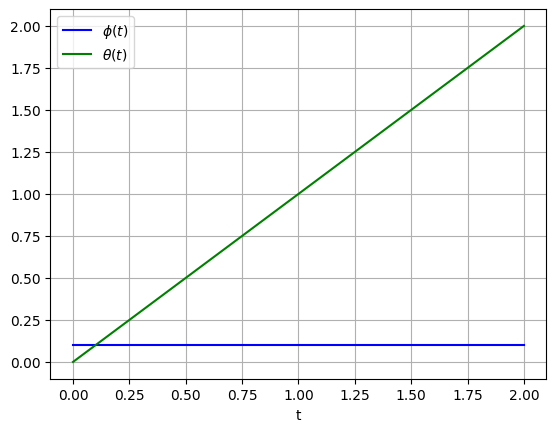

In [179]:
#draw the graphs of solutions phi and theta
plt.plot(t, sol[:, 0], 'b', label=r'$\phi(t)$')
plt.plot(t, sol[:, 1], 'g', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
#this should be like a meridian

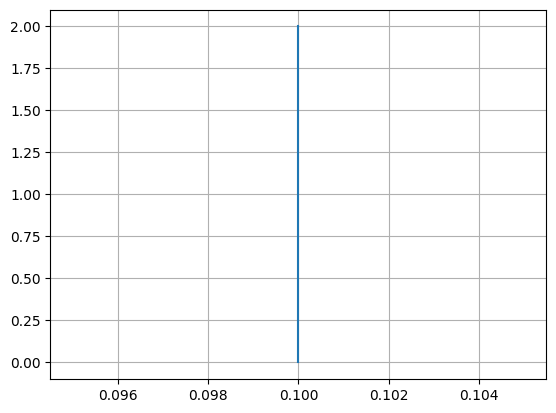

In [183]:
plt.plot (sol[:, 0], sol[:, 1])
plt.grid()
plt.show()

In [180]:
#runge kutta
def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i])*f(y[i], t[i], *args)
        print(y[i])
    return y
sol = rungekutta1(geod, y0, t)

[0.1 0.  0.  1. ]
[0.1 0.1 0.  1. ]
[0.1 0.2 0.  1. ]
[0.1 0.3 0.  1. ]
[0.1 0.4 0.  1. ]
[0.1 0.5 0.  1. ]
[0.1 0.6 0.  1. ]
[0.1 0.7 0.  1. ]
[0.1 0.8 0.  1. ]
[0.1 0.9 0.  1. ]
[0.1 1.  0.  1. ]
[0.1 1.1 0.  1. ]
[0.1 1.2 0.  1. ]
[0.1 1.3 0.  1. ]
[0.1 1.4 0.  1. ]
[0.1 1.5 0.  1. ]
[0.1 1.6 0.  1. ]
[0.1 1.7 0.  1. ]
[0.1 1.8 0.  1. ]
[0.1 1.9 0.  1. ]


## Vectorization of Christoffel symbols and metric derivatives

In [6]:
# let us compute everithing on a grid. i.e. first dimension would give us the index of the node on the vectorized grid
import torch
def g (u): #metrics on sphere
    # u is the vector of points
    R = 3 #Radius
    phi = u[:,0]
    theta = u[:, 1]
    n = u.shape[0] #number of points
    g = torch.zeros((n,2,2))
    #g11 = torch.cos(theta)**2
    #g12 = torch.zeros(n)
    #g21 = torch.zeros(n)
    #g22 = torch.ones(n)
    g11 = 1/theta**2
    g12 = torch.zeros(n)
    g21 = torch.zeros(n)
    g22 = 1/theta**2

    g = torch.cat((g11, g12, g21, g22)).view(4,n)
    g = g.T
    g = g.view(n, 2, 2)
    #g = (R**2)*g
    #g = (R**2)*torch.tensor([[torch.cos(theta)**2, 0],[0, 1]])
    return g

In [11]:
g(torch.tensor([[0.,0.1],[0.,0.1],[0.,1.]]))

tensor([[[100.0000,   0.0000],
         [  0.0000, 100.0000]],

        [[100.0000,   0.0000],
         [  0.0000, 100.0000]],

        [[  1.0000,   0.0000],
         [  0.0000,   1.0000]]])

In [12]:
u = torch.tensor([[0.,0.],[0.,0.],[0.,1.]])

In [13]:
theta = u[:, 1]
theta

tensor([0., 0., 1.])

In [14]:
1/theta**2

tensor([inf, inf, 1.])

In [15]:
numsteps = 3
xs = torch.linspace(-1, 1, steps = numsteps)
ys = torch.linspace(-1, 1, steps = numsteps)
grid = torch.cartesian_prod(xs,ys)

In [16]:
grid.shape

torch.Size([9, 2])

In [17]:
yy = g(grid)

In [18]:
yy

tensor([[[1., 0.],
         [0., 1.]],

        [[inf, 0.],
         [0., inf]],

        [[1., 0.],
         [0., 1.]],

        [[1., 0.],
         [0., 1.]],

        [[inf, 0.],
         [0., inf]],

        [[1., 0.],
         [0., 1.]],

        [[1., 0.],
         [0., 1.]],

        [[inf, 0.],
         [0., inf]],

        [[1., 0.],
         [0., 1.]]])

In [19]:
torch.cat((yy,yy),1).view(9,2,2,2)

tensor([[[[1., 0.],
          [0., 1.]],

         [[1., 0.],
          [0., 1.]]],


        [[[inf, 0.],
          [0., inf]],

         [[inf, 0.],
          [0., inf]]],


        [[[1., 0.],
          [0., 1.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.],
          [0., 1.]],

         [[1., 0.],
          [0., 1.]]],


        [[[inf, 0.],
          [0., inf]],

         [[inf, 0.],
          [0., inf]]],


        [[[1., 0.],
          [0., 1.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.],
          [0., 1.]],

         [[1., 0.],
          [0., 1.]]],


        [[[inf, 0.],
          [0., inf]],

         [[inf, 0.],
          [0., inf]]],


        [[[1., 0.],
          [0., 1.]],

         [[1., 0.],
          [0., 1.]]]])

In [20]:
torch.inverse(yy) # inverts several matrices at once!!

tensor([[[1., -0.],
         [0., 1.]],

        [[0., -0.],
         [0., 0.]],

        [[1., -0.],
         [0., 1.]],

        [[1., -0.],
         [0., 1.]],

        [[0., -0.],
         [0., 0.]],

        [[1., -0.],
         [0., 1.]],

        [[1., -0.],
         [0., 1.]],

        [[0., -0.],
         [0., 0.]],

        [[1., -0.],
         [0., 1.]]])

In [21]:
def dg (u): #dg
    #phi, theta = u
    #think of x = phi, y = theta
    # u is the vector of points
    R = 3 #Radius
    phi = u[:,0]
    theta = u[:, 1]
    n = u.shape[0] #number of points
    g = torch.zeros((n,2,2,2))
    
    #x derivatives of g
 
    gx11 = torch.zeros(n)
    gx12 = torch.zeros(n)
    gx21 = torch.zeros(n)
    gx22 = torch.zeros(n)

    gx = torch.cat((gx11, gx12, gx21, gx22)).view(4,n)
    gx = gx.T
    gx = gx.view(n, 2, 2)
    
    #y derivatives of g
    
    #gy11 = -R**2*torch.sin(2*theta)
    gy11 = -2/theta**3
    gy12 = torch.zeros(n)
    gy21 = torch.zeros(n)
    gy22 = -2/theta**3
    #gy22 = torch.zeros(n)

    gy = torch.cat((gy11, gy12, gy21, gy22)).view(4,n)
    gy = gy.T
    gy = gy.view(n, 2, 2)

    dg = torch.cat((gx,gy),1).view(n,2,2,2)
    #g = np.array([[[0, 0],
    #               [0, 0]],
    #              [[-R**2*np.sin(2*theta), 0],
    #               [0, 0]]])
    return dg

In [22]:
dg(grid[:3])

tensor([[[[ 0.,  0.],
          [ 0.,  0.]],

         [[ 2.,  0.],
          [ 0.,  2.]]],


        [[[ 0.,  0.],
          [ 0.,  0.]],

         [[-inf,  0.],
          [ 0., -inf]]],


        [[[ 0.,  0.],
          [ 0.,  0.]],

         [[-2.,  0.],
          [ 0., -2.]]]])

In [1]:
#Christoffel symbols at a vector of points  u = num of points, phi , theta
#this code does not use loops
def Ch(u):
    #phi = u[:,0]
    #theta = u[:, 1]
    n = u.shape[0]
    Ch = torch.zeros((n, 2,2,2))
    for i in range(2):
        for j in range(2):
            for l in range(2):
                for k in range(2):
                    Ch[:,l,i,j] += 0.5 * torch.inverse(g(u))[:,l,k] * (dg(u)[:,i,k,j] + dg(u)[:,j,i,k] - dg(u)[:,k,i,j]) #Ch^l_ij
                    #Ch[l,i,j] += 0.5 * g_inv(u)[l,k] * (dg(u)[i,k,j] + dg(u)[j,i,k] - dg(u)[k,i,j]) #Ch^l_ij
    return Ch

In [24]:
Ch(grid)

tensor([[[[ 0.,  1.],
          [ 1.,  0.]],

         [[-1.,  0.],
          [ 0.,  1.]]],


        [[[nan, nan],
          [nan, nan]],

         [[nan, nan],
          [nan, nan]]],


        [[[ 0., -1.],
          [-1.,  0.]],

         [[ 1.,  0.],
          [ 0., -1.]]],


        [[[ 0.,  1.],
          [ 1.,  0.]],

         [[-1.,  0.],
          [ 0.,  1.]]],


        [[[nan, nan],
          [nan, nan]],

         [[nan, nan],
          [nan, nan]]],


        [[[ 0., -1.],
          [-1.,  0.]],

         [[ 1.,  0.],
          [ 0., -1.]]],


        [[[ 0.,  1.],
          [ 1.,  0.]],

         [[-1.,  0.],
          [ 0.,  1.]]],


        [[[nan, nan],
          [nan, nan]],

         [[nan, nan],
          [nan, nan]]],


        [[[ 0., -1.],
          [-1.,  0.]],

         [[ 1.,  0.],
          [ 0., -1.]]]])

In [25]:
Ch(torch.tensor([[0.,0.]]))

tensor([[[[nan, nan],
          [nan, nan]],

         [[nan, nan],
          [nan, nan]]]])

In [37]:
u0 = torch.tensor([0.0, 0.1]) # initial position in local coord \phi, \theta
v0 = torch.tensor([1.0, 0.0]) # initial speed
y0 = torch.cat((u0,v0)).view(1,4)
t = torch.linspace(0, 2, steps = 21)

In [38]:
y0.shape

torch.Size([1, 4])

In [51]:
t = torch.linspace(0, 2, steps = 21)

In [52]:
#computing geodesics...
# y has shape num of points, u, v
# v := dot(u)
# dot(v)^l = Ch^l_ij * v^i * v^j
def geod(y, t):
    #u, v = y
    n = y.shape[0]
    u = y[: , 0:2:]
    v = y[: , 2::]
    dudt = v
    dvdt = torch.zeros(n, 2)
    for l in range(2):
        for i in range(2):
            for j in range(2):
                dvdt[:, l] -= Ch(u)[:, l,i,j] * v[:, i] * v[:, j]
    dydt = torch.cat((dudt.T, dvdt.T)).T
    # dydt = np.concatenate((dudt, dvdt))
    return dydt

In [53]:
geod(y0,t)

tensor([[  1.,   0.,   0., -10.]])

In [31]:
h = torch.rand(10,4)

In [32]:
geod(h,t)

tensor([[ 0.2040,  0.4465,  0.4035,  0.3494],
        [ 0.1141,  0.3228,  0.0940,  0.1163],
        [ 0.6096,  0.7890,  2.8679,  0.7480],
        [ 0.4865,  0.1078,  0.4302, -0.9236],
        [ 0.1957,  0.4993,  0.2814,  0.3038],
        [ 0.9221,  0.3429,  3.0218, -3.5008],
        [ 0.8048,  0.0042,  0.0115, -1.0908],
        [ 0.8598,  0.3588,  0.8037, -0.7952],
        [ 0.2995,  0.1995,  0.1245, -0.0520],
        [ 0.6698,  0.4328,  0.6403, -0.2887]])

In [48]:
#runge kutta for many initial conditions
def rungekutta_new(f, y0, t, args=()):
    nt = len(t) # number of steps in time
    # len(y0[0]) is the number of initial conditions
    # len(y0[1]) is the dimention of the state space. In our case it is 4 
    y = torch.zeros((nt, y0.shape[0],y0.shape[1]))
    y[0,:,:] = y0
    for i in range(nt - 1):
        y[i+1,:,:] = y[i,:,:] + (t[i+1] - t[i])*f(y[i,:,:], t[i], *args)
        print(y[i,:,:])
    return y

In [54]:
sol0 = rungekutta_new(geod, y0, t)
#solrand = rungekutta_new(geod, h, t)

tensor([[0.0000, 0.1000, 1.0000, 0.0000]])
tensor([[ 0.1000,  0.1000,  1.0000, -1.0000]])
tensor([[ 0.2000,  0.0000, -1.0000, -1.0000]])
tensor([[ 0.1000, -0.1000,     nan,     nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])
tensor([[nan, nan, nan, nan]])


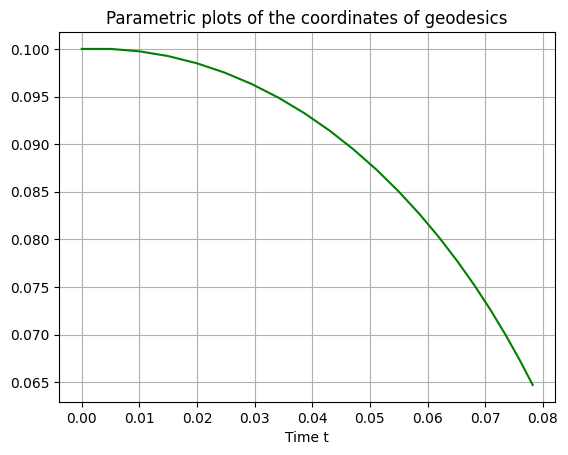

In [50]:

import matplotlib.pyplot as plt

#plt.plot(t, solrand[:, :, 0], 'b', label=r'$\phi(t)$')
plt.plot(sol0[:, :, 0], sol0[:, :, 1], 'g', label=r'$\theta(t)$')
#plt.plot(t, solrand[:, :, 1], 'g', label=r'$\theta(t)$')
#plt.legend(loc='best')
#plt.plot( sol.T )
plt.title( "Parametric plots of the coordinates of geodesics")
plt.xlabel( "Time t")
plt.grid()

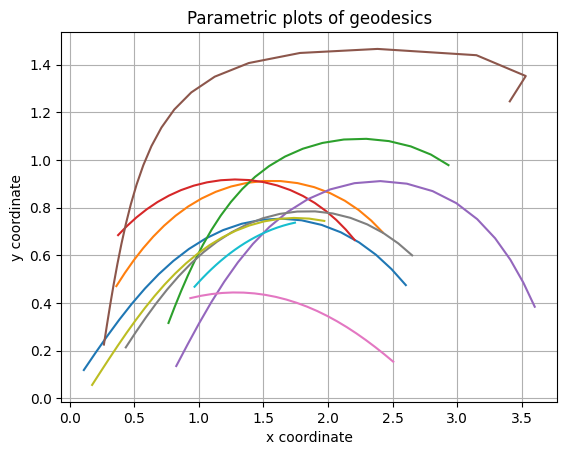

In [90]:
plt.plot(solrand[:, :, 0], solrand[:, :, 1])
#plt.plot(t, solrand[:, :, 1], 'g', label=r'$\theta(t)$')
#plt.legend(loc='best')
#plt.plot( sol.T )
plt.title( "Plots of geodesics with random initial conditions")
plt.xlabel( "x coordinate")
plt.ylabel( "y coordinate")
plt.grid()